In [563]:
# Author: Eric Liu
# Date: 28 Feb 2025
# Description: The goal of this project is to identify the feature variables that increases the chances of developing Alzheimer
# Dataset Source: https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global

# Dataset type: Tabular
# Number of rows: 74,283 rows
# Number of columns: 25 columns
# Target variable: (Yes/No) (Binary Classification)(Alzheimer’s Diagnosis)

In [564]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.neural_network import MLPClassifier

In [565]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')
df.head()

Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension Cholesterol Level  \
0          Never        Occasionally       No           No            Normal   
1         Former               Never       No           No            Normal   
2        Current        Occasionally       No          Yes            Normal   
3          Never           Regularly      Yes           No            Normal   
4         Former               Never      Yes           No            Normal   

  Family History of Alzheimer’s  Cognitive Test Score Depression Level  \
0                            No                    90              Low   
1                            No                    65              Low   
2                            No                    43             High   
3                            No                    81           Medium   
4                            No                    49             High   

  Sleep Quality Dietary Habits Air Pollution Exposure Employment Status  \
0          Poor        Healthy                   High           Retired   
1          Good        Healthy                 Medium        Unemployed   
2          Good        Average                 Medium          Employed   
3       Average        Healthy                 Medium           Retired   
4          Poor      Unhealthy                   High          Employed   

  Marital Status Genetic Risk Factor (APOE-ε4 allele) Social Engagement Level  \
0         Single                                   No                     Low   
1        Widowed                                   No                    High   
2         Single                                   No                     Low   
3         Single                                   No                    High   
4        Married                                   No                     Low   

  Income Level Stress Levels Urban vs Rural Living Alzheimer’s Diagnosis  
0       Medium          High                 Urban                    No  
1          Low          High                 Urban                    No  
2       Medium          High                 Rural                    No  
3       Medium           Low                 Rural                    No  
4       Medium          High                 Rural                    No

In [566]:
df.shape

(74283, 25)

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

### **1. Pre-Processing**

#### **1a. Check for Missing Values**

In [568]:
print("Missing N/A Values:", df.isna().sum().sum())
print("Missing Null Values:", df.isnull().sum().sum())

Missing N/A Values: 0
Missing Null Values: 0


#### **1b. Check for Duplicated Values**

In [569]:
print("Duplicated Values:", df.duplicated().sum())

Duplicated Values: 0


### **2. Data Visualization**

#### **2a. Check Data Distribution**

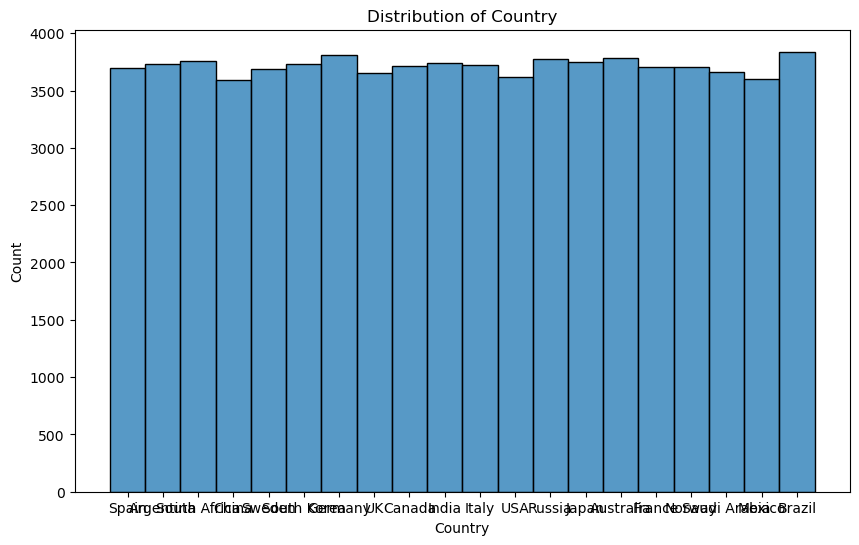

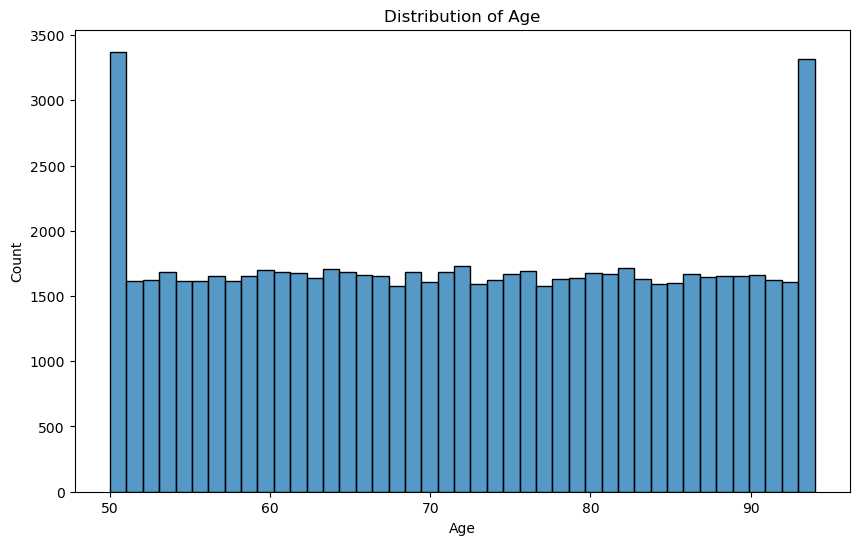

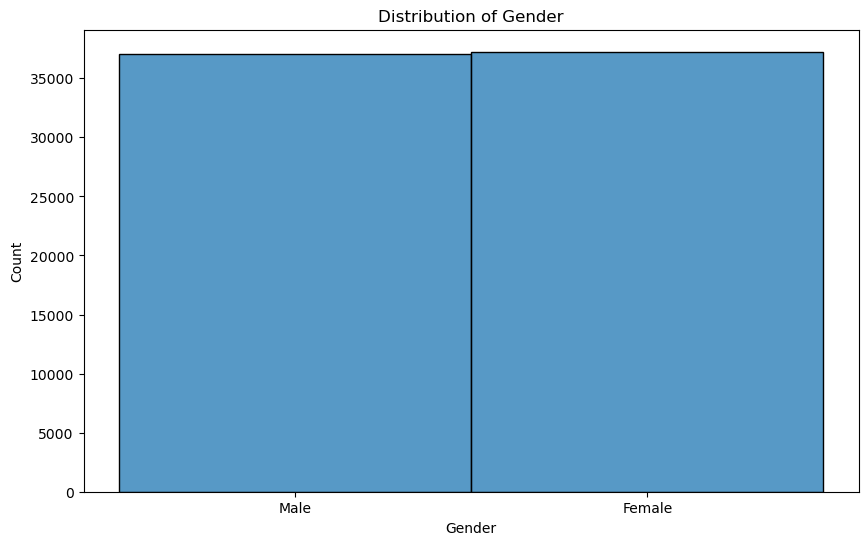

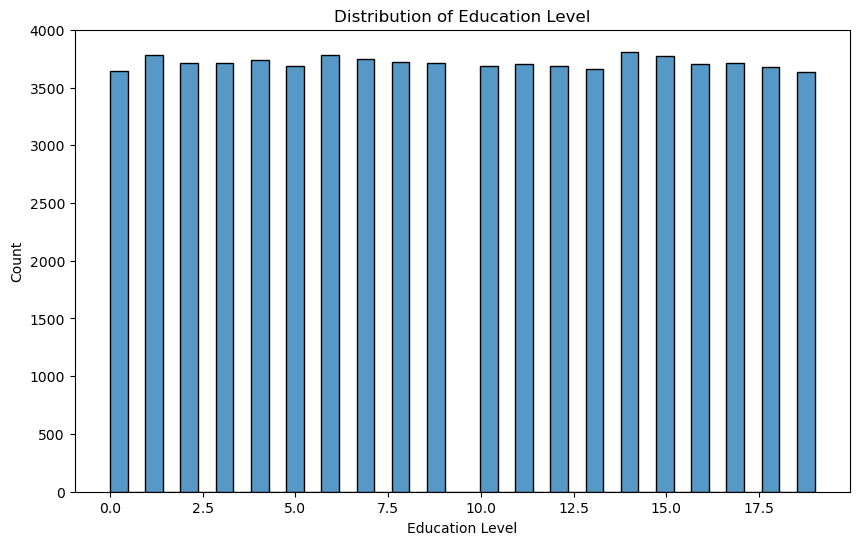

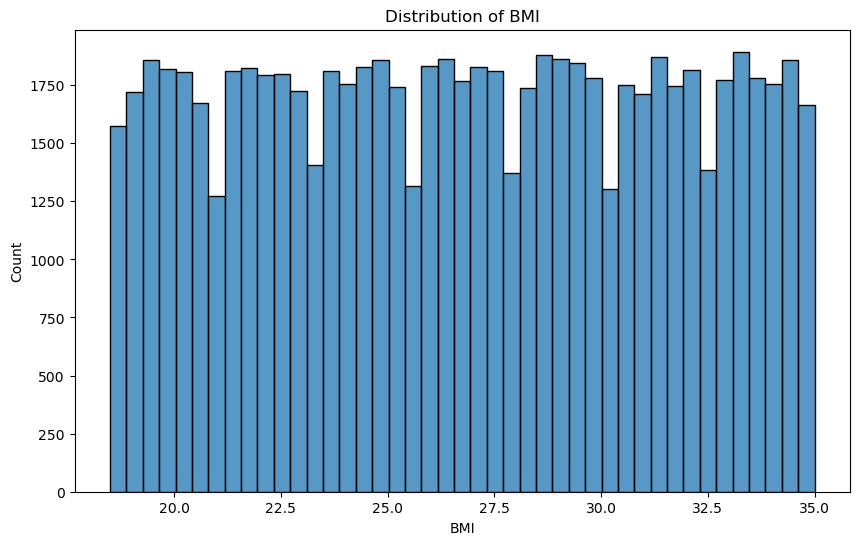

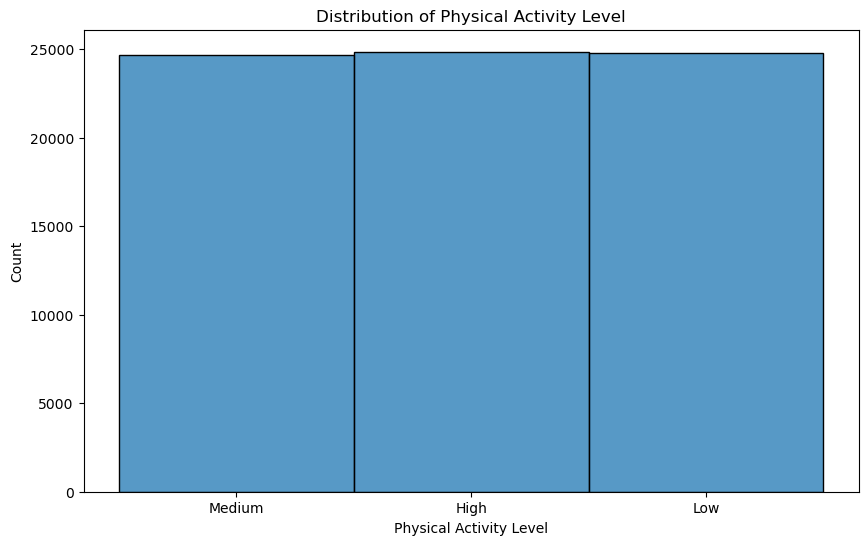

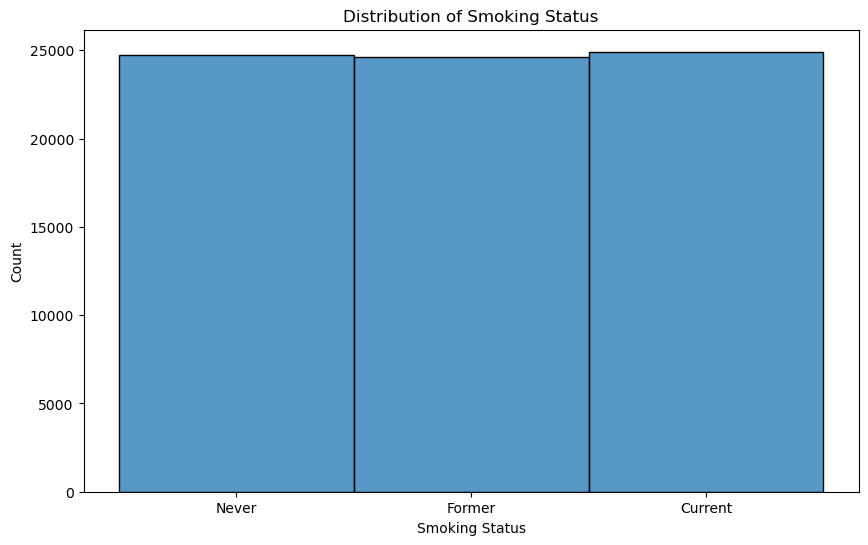

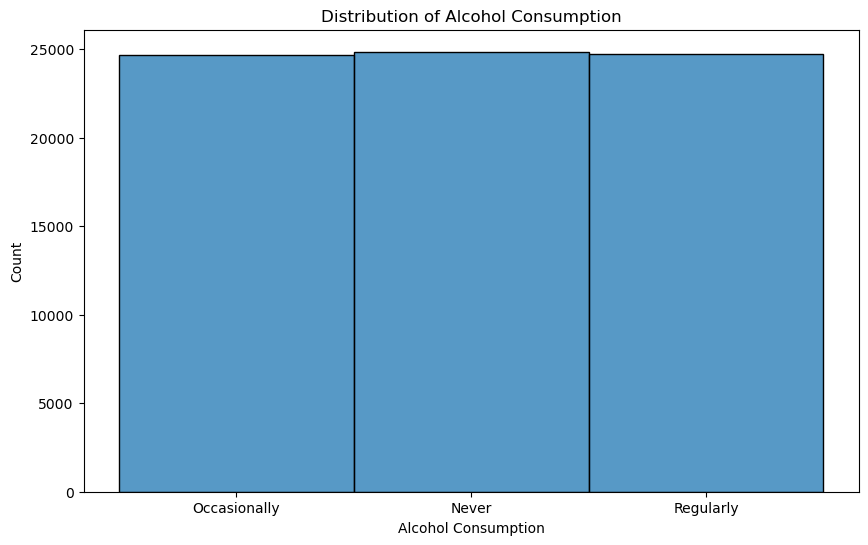

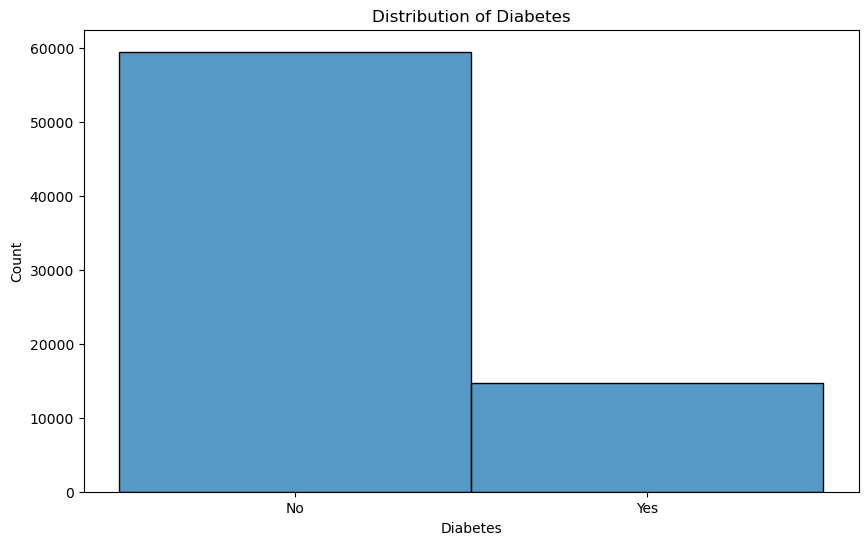

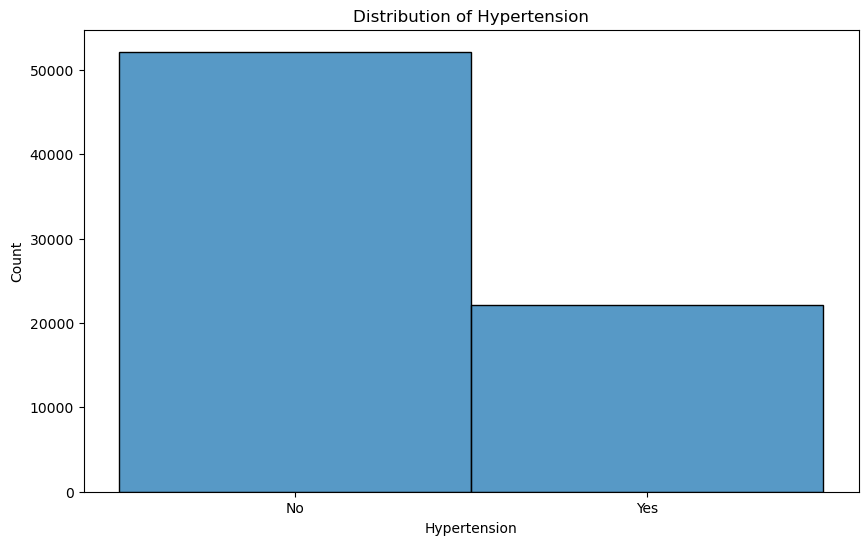

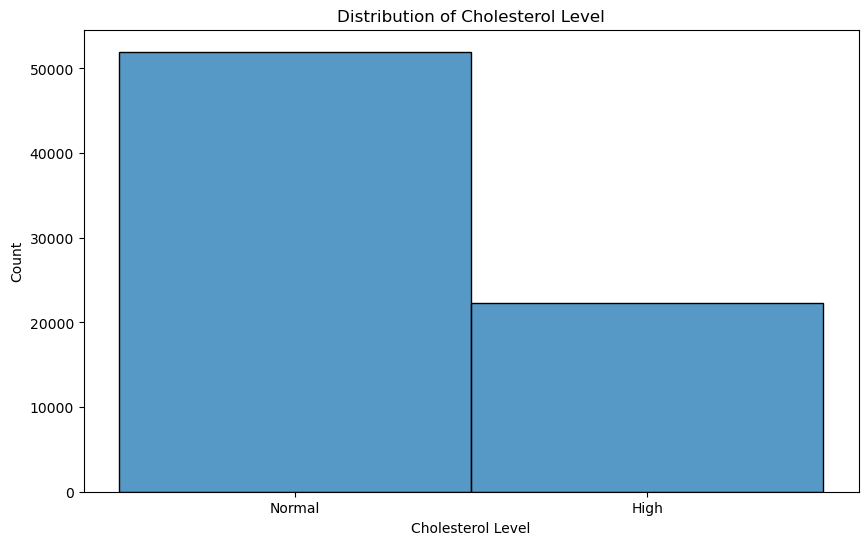

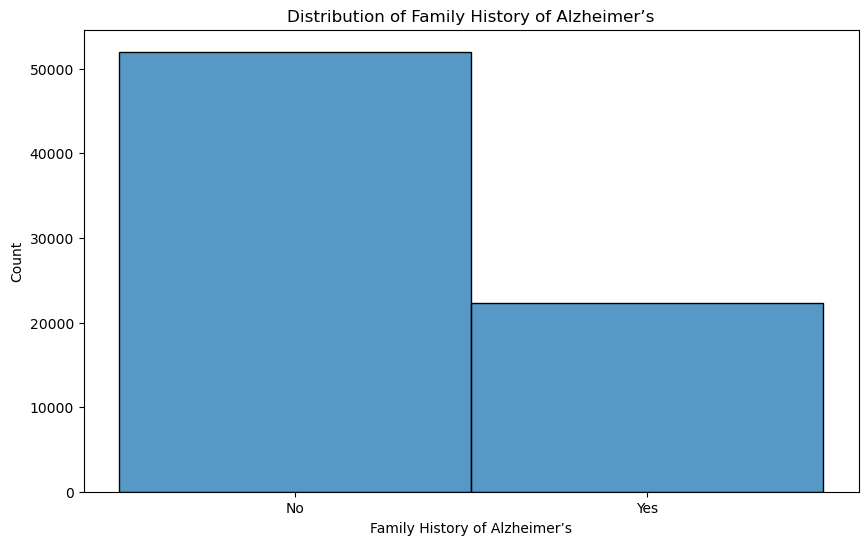

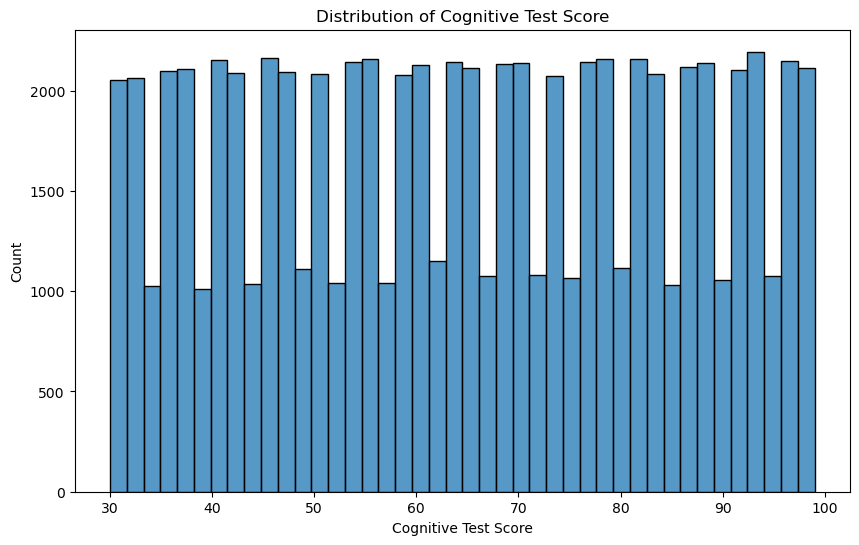

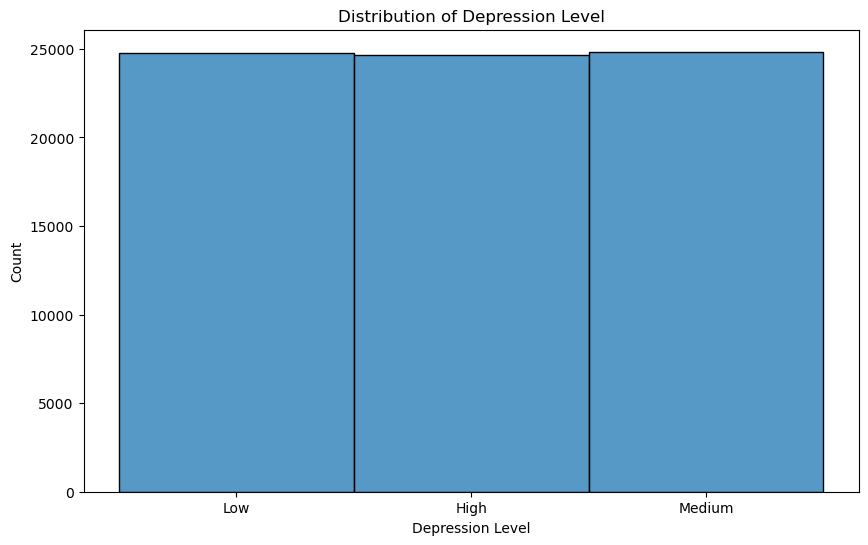

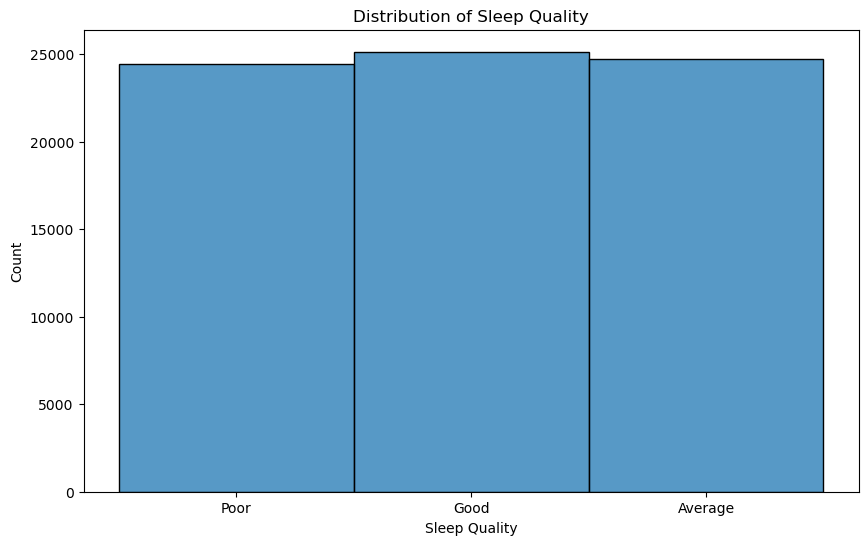

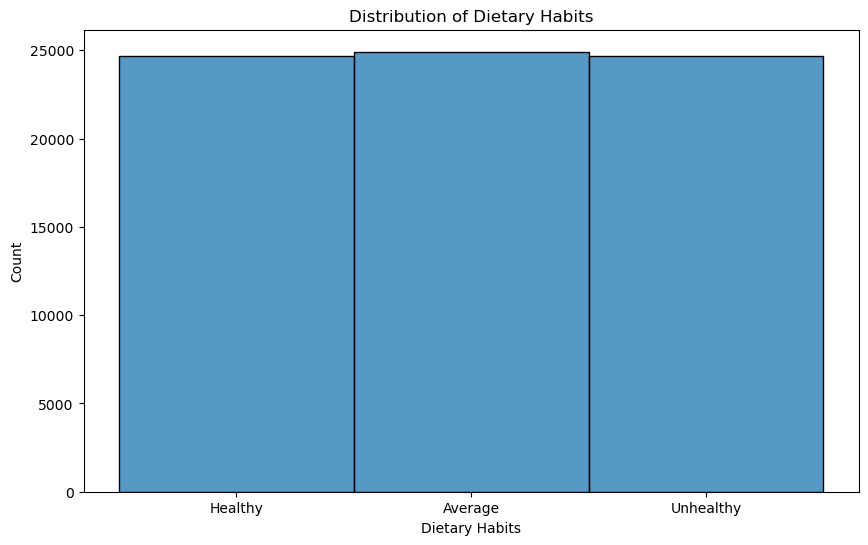

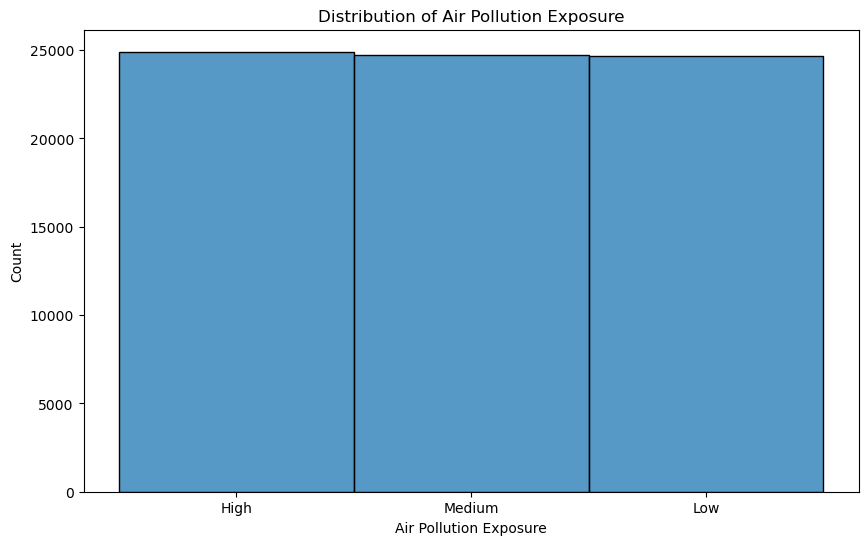

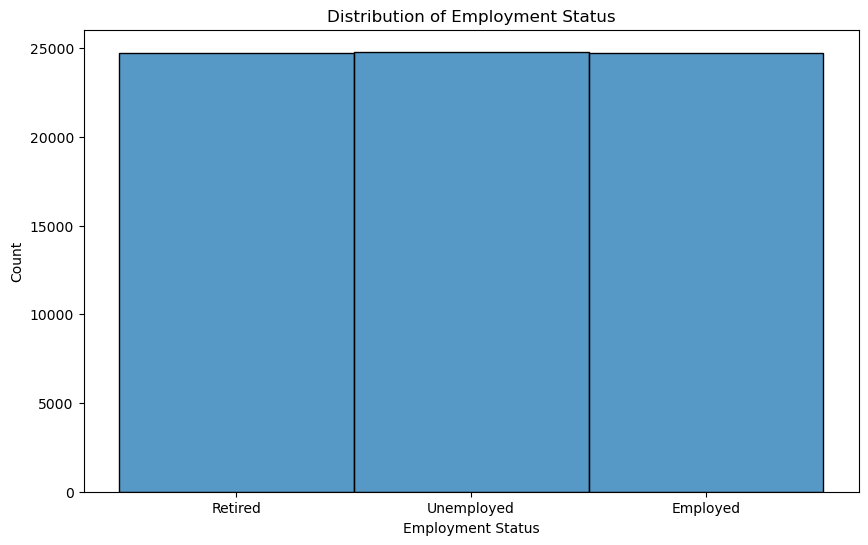

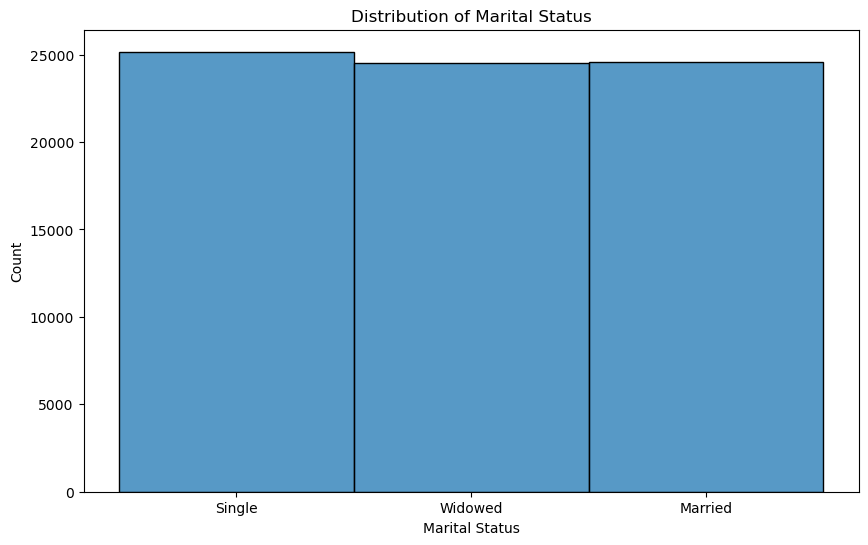

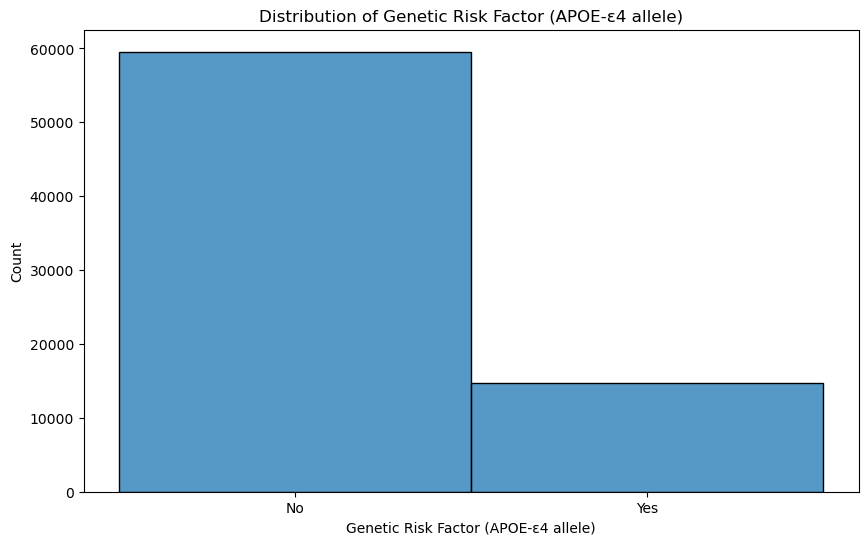

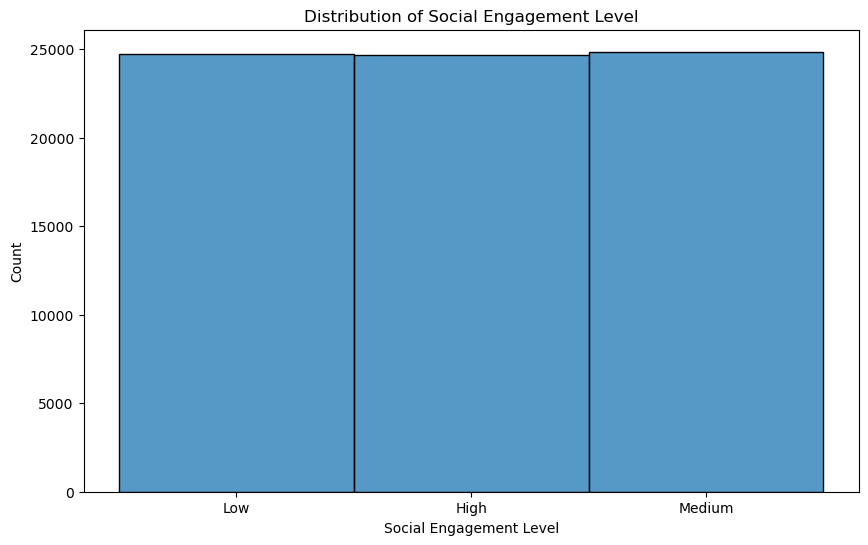

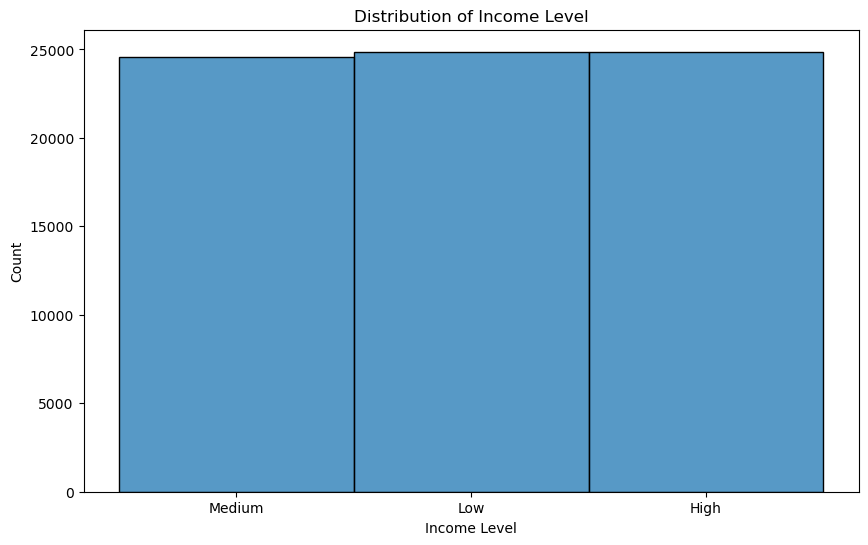

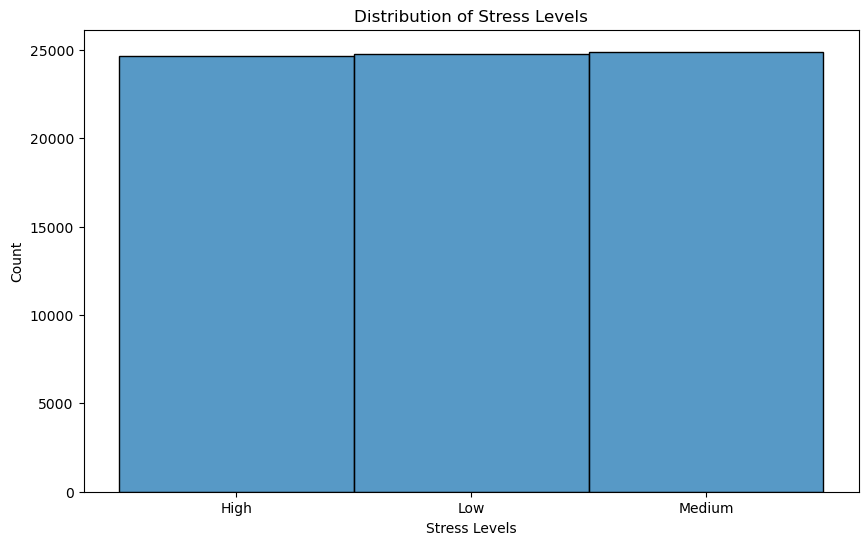

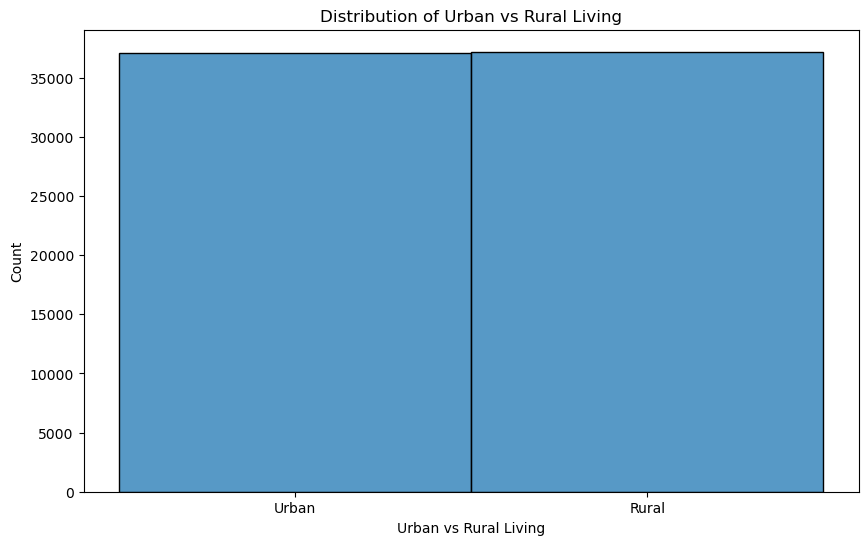

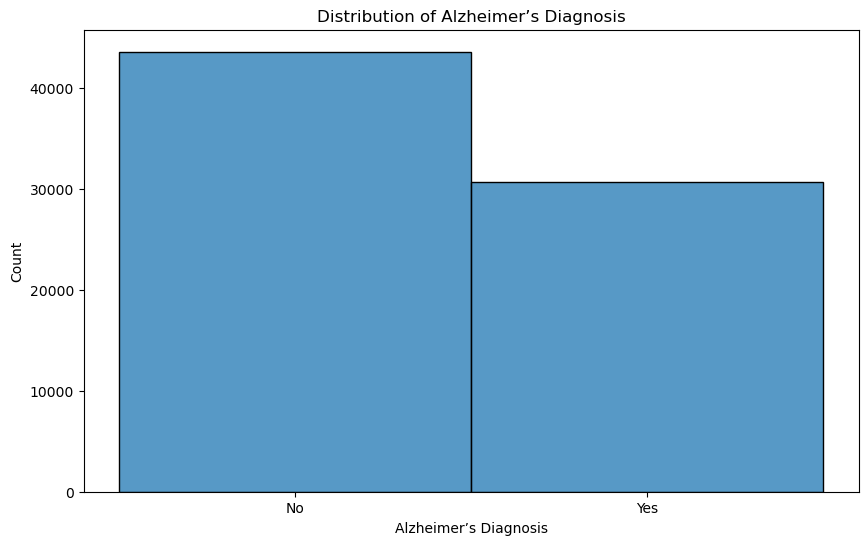

In [570]:
for feature in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

#### **2b. Check for Outliers**

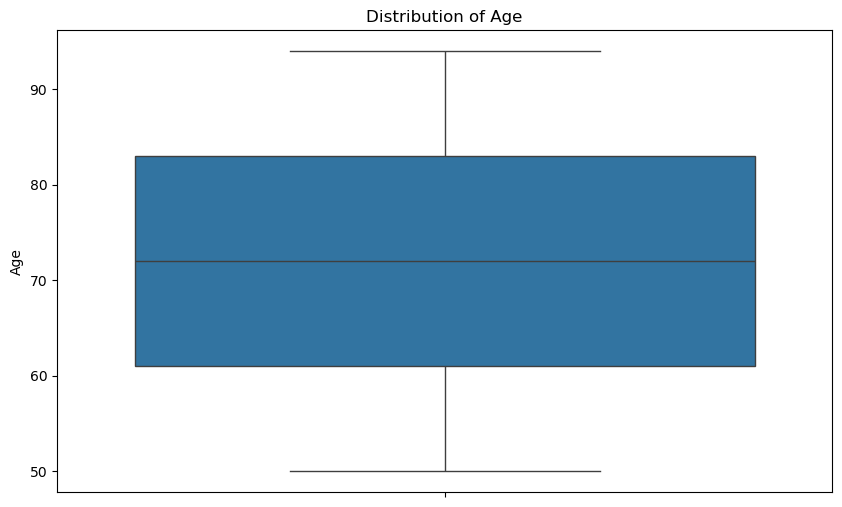

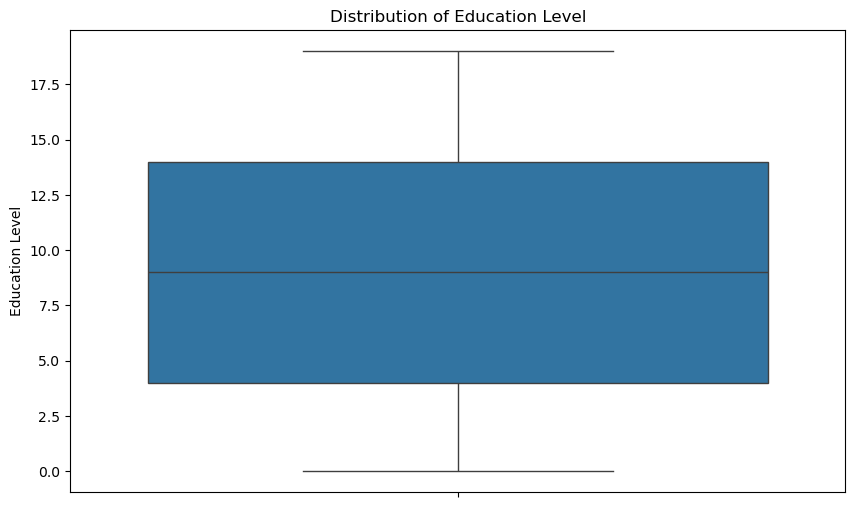

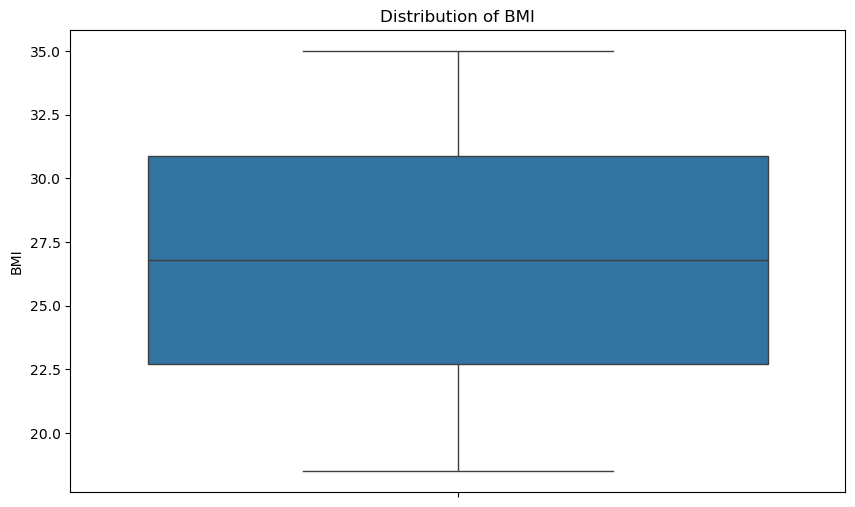

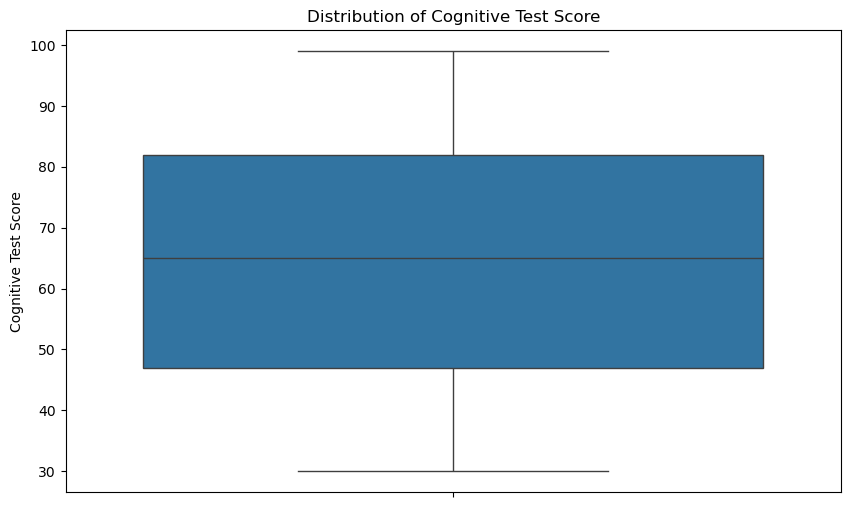

In [571]:
for feature in ["Age", "Education Level", "BMI", "Cognitive Test Score"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

### **3. Train/Test Split**

In [572]:
X = df.drop('Alzheimer’s Diagnosis', axis=1)
y = df['Alzheimer’s Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [573]:
#enc = OneHotEncoder(sparse_output=False)
#enc.fit_transform(df[""])

#### **3a. Map all Yes / No Features to 1 or 0**

In [574]:
X_train = X_train.replace({'No': 0, 'Yes': 1})
y_train = y_train.replace({'No': 0, 'Yes': 1})

X_test = X_test.replace({'No': 0, 'Yes': 1})
y_test = y_test.replace({'No': 0, 'Yes': 1})

/var/folders/sj/4svrpylj6q1db5t9v4xp0dsh0000gn/T/ipykernel_1470/3860529184.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.replace({'No': 0, 'Yes': 1})
/var/folders/sj/4svrpylj6q1db5t9v4xp0dsh0000gn/T/ipykernel_1470/3860529184.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'No': 0, 'Yes': 1})
/var/folders/sj/4svrpylj6q1db5t9v4xp0dsh0000gn/T/ipykernel_1470/3860529184.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

#### **3b. Identify and Label Encode the Ordinal features**

In [575]:
for i in [2, 5, 6, 7, 10, 13, 14, 15, 16, 20, 21, 22, 23]:
    col_name = X_train.columns[i]
    print(f"{col_name :<23}", ":", df[col_name].unique())

Gender                  : ['Male' 'Female']
Physical Activity Level : ['Medium' 'High' 'Low']
Smoking Status          : ['Never' 'Former' 'Current']
Alcohol Consumption     : ['Occasionally' 'Never' 'Regularly']
Cholesterol Level       : ['Normal' 'High']
Depression Level        : ['Low' 'High' 'Medium']
Sleep Quality           : ['Poor' 'Good' 'Average']
Dietary Habits          : ['Healthy' 'Average' 'Unhealthy']
Air Pollution Exposure  : ['High' 'Medium' 'Low']
Social Engagement Level : ['Low' 'High' 'Medium']
Income Level            : ['Medium' 'Low' 'High']
Stress Levels           : ['High' 'Low' 'Medium']
Urban vs Rural Living   : ['Urban' 'Rural']


In [578]:
LowMedHigh = ['Low', 'Medium', 'High']
Gender = ['Male', 'Female']
Smoking = ['Never', 'Former', 'Current']
Alcohol = ['Never', 'Occasionally', 'Regularly']
Cholesterol = ['Normal', 'High']
Sleep = ['Poor', 'Average', 'Good']
Diet = ['Unhealthy', 'Average', 'Healthy']
Urban = ['Urban', 'Rural']

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1, categories = [Gender, LowMedHigh, Smoking, Alcohol, Cholesterol, LowMedHigh, Sleep, Diet, LowMedHigh, LowMedHigh, LowMedHigh, LowMedHigh, Urban])
X_train[['Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Cholesterol Level', 'Depression Level', 
    'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living']] = enc.fit_transform(
X_train[['Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Cholesterol Level', 'Depression Level', 
    'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living']]).astype('int64')

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1, categories = [Gender, LowMedHigh, Smoking, Alcohol, Cholesterol, LowMedHigh, Sleep, Diet, LowMedHigh, LowMedHigh, LowMedHigh, LowMedHigh, Urban])
X_test[['Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Cholesterol Level', 'Depression Level', 
    'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living']] = enc.fit_transform(
X_test[['Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Cholesterol Level', 'Depression Level', 
    'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living']]).astype('int64')
X_train

Country  Age  Gender  Education Level   BMI  \
37761         Italy   66       0               15  20.9   
42960        France   91       1                9  31.0   
34335           USA   70       0                0  22.6   
45926        Russia   70       0                6  34.3   
34537        Norway   67       1                9  27.6   
...             ...  ...     ...              ...   ...   
50092  South Africa   68       0               11  34.3   
14514         Japan   79       1               11  29.9   
57030        Sweden   51       0                8  20.4   
56717        Sweden   54       1                8  33.7   
62198        Russia   63       0                2  29.7   

       Physical Activity Level  Smoking Status  Alcohol Consumption  Diabetes  \
37761                        2               1                    0         0   
42960                        1               0                    2         0   
34335                        1               2                    0         0   
45926                        2               1                    0         0   
34537                        2               1                    0         1   
...                        ...             ...                  ...       ...   
50092                        0               2                    1         1   
14514                        1               1                    2         0   
57030                        1               1                    2         0   
56717                        0               2                    2         0   
62198                        1               2                    0         0   

       Hypertension  Cholesterol Level  Family History of Alzheimer’s  \
37761             1                  0                              0   
42960             0                  0                              0   
34335             0                  0                              0   
45926             0                  0                              1   
34537             1                  0                              1   
...             ...                ...                            ...   
50092             1                  0                              1   
14514             1                  1                              1   
57030             1                  0                              0   
56717             1                  1                              0   
62198             1                  0                              1   

       Cognitive Test Score  Depression Level  Sleep Quality  Dietary Habits  \
37761                    81                 2              2               1   
42960                    78                 0              2               2   
34335                    97                 0              1               2   
45926                    78                 2              0               1   
34537                    34                 2              2               2   
...                     ...               ...            ...             ...   
50092                    49                 0              2               2   
14514                    90                 0              2               2   
57030                    49                 0              2               0   
56717                    40                 0              0               1   
62198                    86                 2              1               0   

       Air Pollution Exposure Employment Status Marital Status  \
37761                       0          Employed         Single   
42960                       2           Retired        Widowed   
34335                       0        Unemployed        Married   
45926                       1           Retired        Widowed   
34537                       0           Retired        Married   
...                       ...               ...            ...   
50092                       2 

#### **3c. Identify and One Hot Encode the Nominal features**

In [579]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform ='pandas')
Ohetransform = ohe.fit_transform(X_train[['Country', 'Employment Status', 'Marital Status']]).astype('int64')

#Updating original table with OneHotEncode
X_train = pd.concat([X_train, Ohetransform], axis=1).drop(errors='ignore', columns = ['Country', 'Employment Status', 'Marital Status'])
X_test = pd.concat([X_test, Ohetransform], axis=1).drop(errors='ignore', columns = ['Country', 'Employment Status', 'Marital Status'])
X_train

Age  Gender  Education Level   BMI  Physical Activity Level  \
37761   66       0               15  20.9                        2   
42960   91       1                9  31.0                        1   
34335   70       0                0  22.6                        1   
45926   70       0                6  34.3                        2   
34537   67       1                9  27.6                        2   
...    ...     ...              ...   ...                      ...   
50092   68       0               11  34.3                        0   
14514   79       1               11  29.9                        1   
57030   51       0                8  20.4                        1   
56717   54       1                8  33.7                        0   
62198   63       0                2  29.7                        1   

       Smoking Status  Alcohol Consumption  Diabetes  Hypertension  \
37761               1                    0         0             1   
42960               0                    2         0             0   
34335               2                    0         0             0   
45926               1                    0         0             0   
34537               1                    0         1             1   
...               ...                  ...       ...           ...   
50092               2                    1         1             1   
14514               1                    2         0             1   
57030               1                    2         0             1   
56717               2                    2         0             1   
62198               2                    0         0             1   

       Cholesterol Level  Family History of Alzheimer’s  Cognitive Test Score  \
37761                  0                              0                    81   
42960                  0                              0                    78   
34335                  0                              0                    97   
45926                  0                              1                    78   
34537                  0                              1                    34   
...                  ...                            ...                   ...   
50092                  0                              1                    49   
14514                  1                              1                    90   
57030                  0                              0                    49   
56717                  1                              0                    40   
62198                  0                              1                    86   

       Depression Level  Sleep Quality  Dietary Habits  \
37761                 2              2               1   
42960                 0              2               2   
34335                 0              1               2   
45926                 2              0               1   
34537                 2              2               2   
...                 ...            ...             ...   
50092                 0              2               2   
14514                 0              2               2   
57030                 0              2               0   
56717                 0              0               1   
62198                 2              1               0   

       Air Pollution Exposure  Genetic Risk Factor (APOE-ε4 allele)  \
37761                       0                                     0   
42960                       2                                     1   
34335                       0                                     0   
45926                       1                                     0   
34537                       0                                     0   
...                       ...                                   ...   
50092                       2                                     0   
14514                       2                                     0   
57030           

### **4. Scaling our data**

In [580]:
col_numerical_only = ['Age', 'Education Level', 'BMI', 'Cognitive Test Score']
X_train_numerical = pd.DataFrame(X_train, columns=col_numerical_only)
X_test_numerical = pd.DataFrame(X_test, columns=col_numerical_only)
X_train_numerical

Age  Education Level   BMI  Cognitive Test Score
37761   66               15  20.9                    81
42960   91                9  31.0                    78
34335   70                0  22.6                    97
45926   70                6  34.3                    78
34537   67                9  27.6                    34
...    ...              ...   ...                   ...
50092   68               11  34.3                    49
14514   79               11  29.9                    90
57030   51                8  20.4                    49
56717   54                8  33.7                    40
62198   63                2  29.7                    86

[59426 rows x 4 columns]

In [581]:
scaler = StandardScaler()
X_train_numerical_scaled = pd.DataFrame(scaler.fit_transform(X_train_numerical), columns = col_numerical_only).reset_index(drop=True)
X_test_numerical_scaled = pd.DataFrame(scaler.transform(X_test_numerical), columns = col_numerical_only).reset_index(drop=True)
X_train_numerical_scaled

Age  Education Level       BMI  Cognitive Test Score
0     -0.456001         0.955499 -1.232522              0.810354
1      1.469225        -0.086182  0.885760              0.661416
2     -0.147965        -1.648702 -0.875980              1.604690
3     -0.147965        -0.607022  1.577872              0.661416
4     -0.378992        -0.086182  0.172675             -1.523007
...         ...              ...       ...                   ...
59421 -0.301983         0.261045  1.577872             -0.778317
59422  0.545116         0.261045  0.655056              1.257168
59423 -1.611137        -0.259795 -1.337388             -0.778317
59424 -1.380110        -0.259795  1.452034             -1.225131
59425 -0.687028        -1.301475  0.613110              1.058584

[59426 rows x 4 columns]

In [582]:
X_train = X_train.drop(errors='ignore', columns = col_numerical_only).reset_index(drop=True)
X_test = X_test.drop(errors='ignore', columns = col_numerical_only).reset_index(drop=True)

X_train_scaled = pd.concat([X_train, X_train_numerical_scaled], axis=1)
X_test_scaled = pd.concat([X_test, X_test_numerical_scaled], axis=1)
X_train_scaled

Gender  Physical Activity Level  Smoking Status  Alcohol Consumption  \
0           0                        2               1                    0   
1           1                        1               0                    2   
2           0                        1               2                    0   
3           0                        2               1                    0   
4           1                        2               1                    0   
...       ...                      ...             ...                  ...   
59421       0                        0               2                    1   
59422       1                        1               1                    2   
59423       0                        1               1                    2   
59424       1                        0               2                    2   
59425       0                        1               2                    0   

       Diabetes  Hypertension  Cholesterol Level  \
0             0             1                  0   
1             0             0                  0   
2             0             0                  0   
3             0             0                  0   
4             1             1                  0   
...         ...           ...                ...   
59421         1             1                  0   
59422         0             1                  1   
59423         0             1                  0   
59424         0             1                  1   
59425         0             1                  0   

       Family History of Alzheimer’s  Depression Level  Sleep Quality  \
0                                  0                 2              2   
1                                  0                 0              2   
2                                  0                 0              1   
3                                  1                 2              0   
4                                  1                 2              2   
...                              ...               ...            ...   
59421                              1                 0              2   
59422                              1                 0              2   
59423                              0                 0              2   
59424                              0                 0              0   
59425                              1                 2              1   

       Dietary Habits  Air Pollution Exposure  \
0                   1                       0   
1                   2                       2   
2                   2                       0   
3                   1                       1   
4                   2                       0   
...               ...                     ...   
59421               2                       2   
59422               2                       2   
59423               0                       2   
59424               1                       1   
59425               0                       0   

       Genetic Risk Factor (APOE-ε4 allele)  Social Engagement Level  \
0                                         0                        1   
1                                         1                        1   
2                                         0                        0   
3                                         0                        2   
4                                         0                        0   
...                                     ...                      ...   
59421                                     0                        2   
59422                                     0                        1   
59423                                     0                        0   
59424                                     0                        1   
59425                                     0                        0   

       Income Level  Stress Levels  Urban vs Rural Living  Country_Argentina  \
0                 0   

### **5. Check for Class Imbalance**

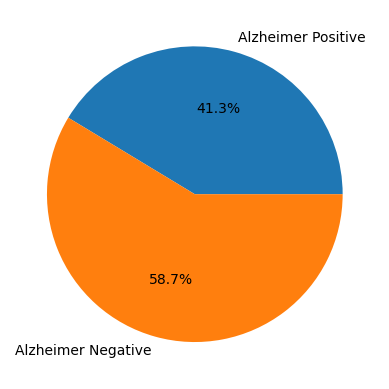

In [583]:
labels = 'Alzheimer Positive', 'Alzheimer Negative'
sizes = [y_train.value_counts()[1], y_train.value_counts()[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

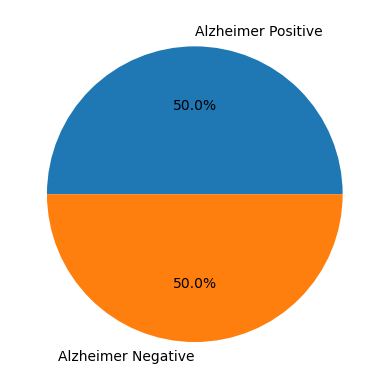

In [584]:
smote = SMOTENC(categorical_features = list(range(45)), random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

labels = 'Alzheimer Positive', 'Alzheimer Negative'
sizes = [y_train_smote.value_counts()[1], y_train_smote.value_counts()[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

### **6. Feature Selection**

In [585]:
correlation_matrix = X_train.corr()

plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.title("Correlation matrix of features ")
plt.show()

In [586]:
X_train.columns

Index(['Gender', 'Physical Activity Level', 'Smoking Status',
       'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Country_Argentina', 'Country_Australia', 'Country_Brazil',
       'Country_Canada', 'Country_China', 'Country_France', 'Country_Germany',
       'Country_India', 'Country_Italy', 'Country_Japan', 'Country_Mexico',
       'Country_Norway', 'Country_Russia', 'Country_Saudi Arabia',
       'Country_South Africa', 'Country_South Korea', 'Country_Spain',
       'Country_Sweden', 'Country_UK', 'Country_USA',
       'Employment Status_Employed', 'Employment Status_Retired',
       'Employment Status_Unemployed', 'Marital Status_Married',
       'Marital Status_Single', 'Marital Status

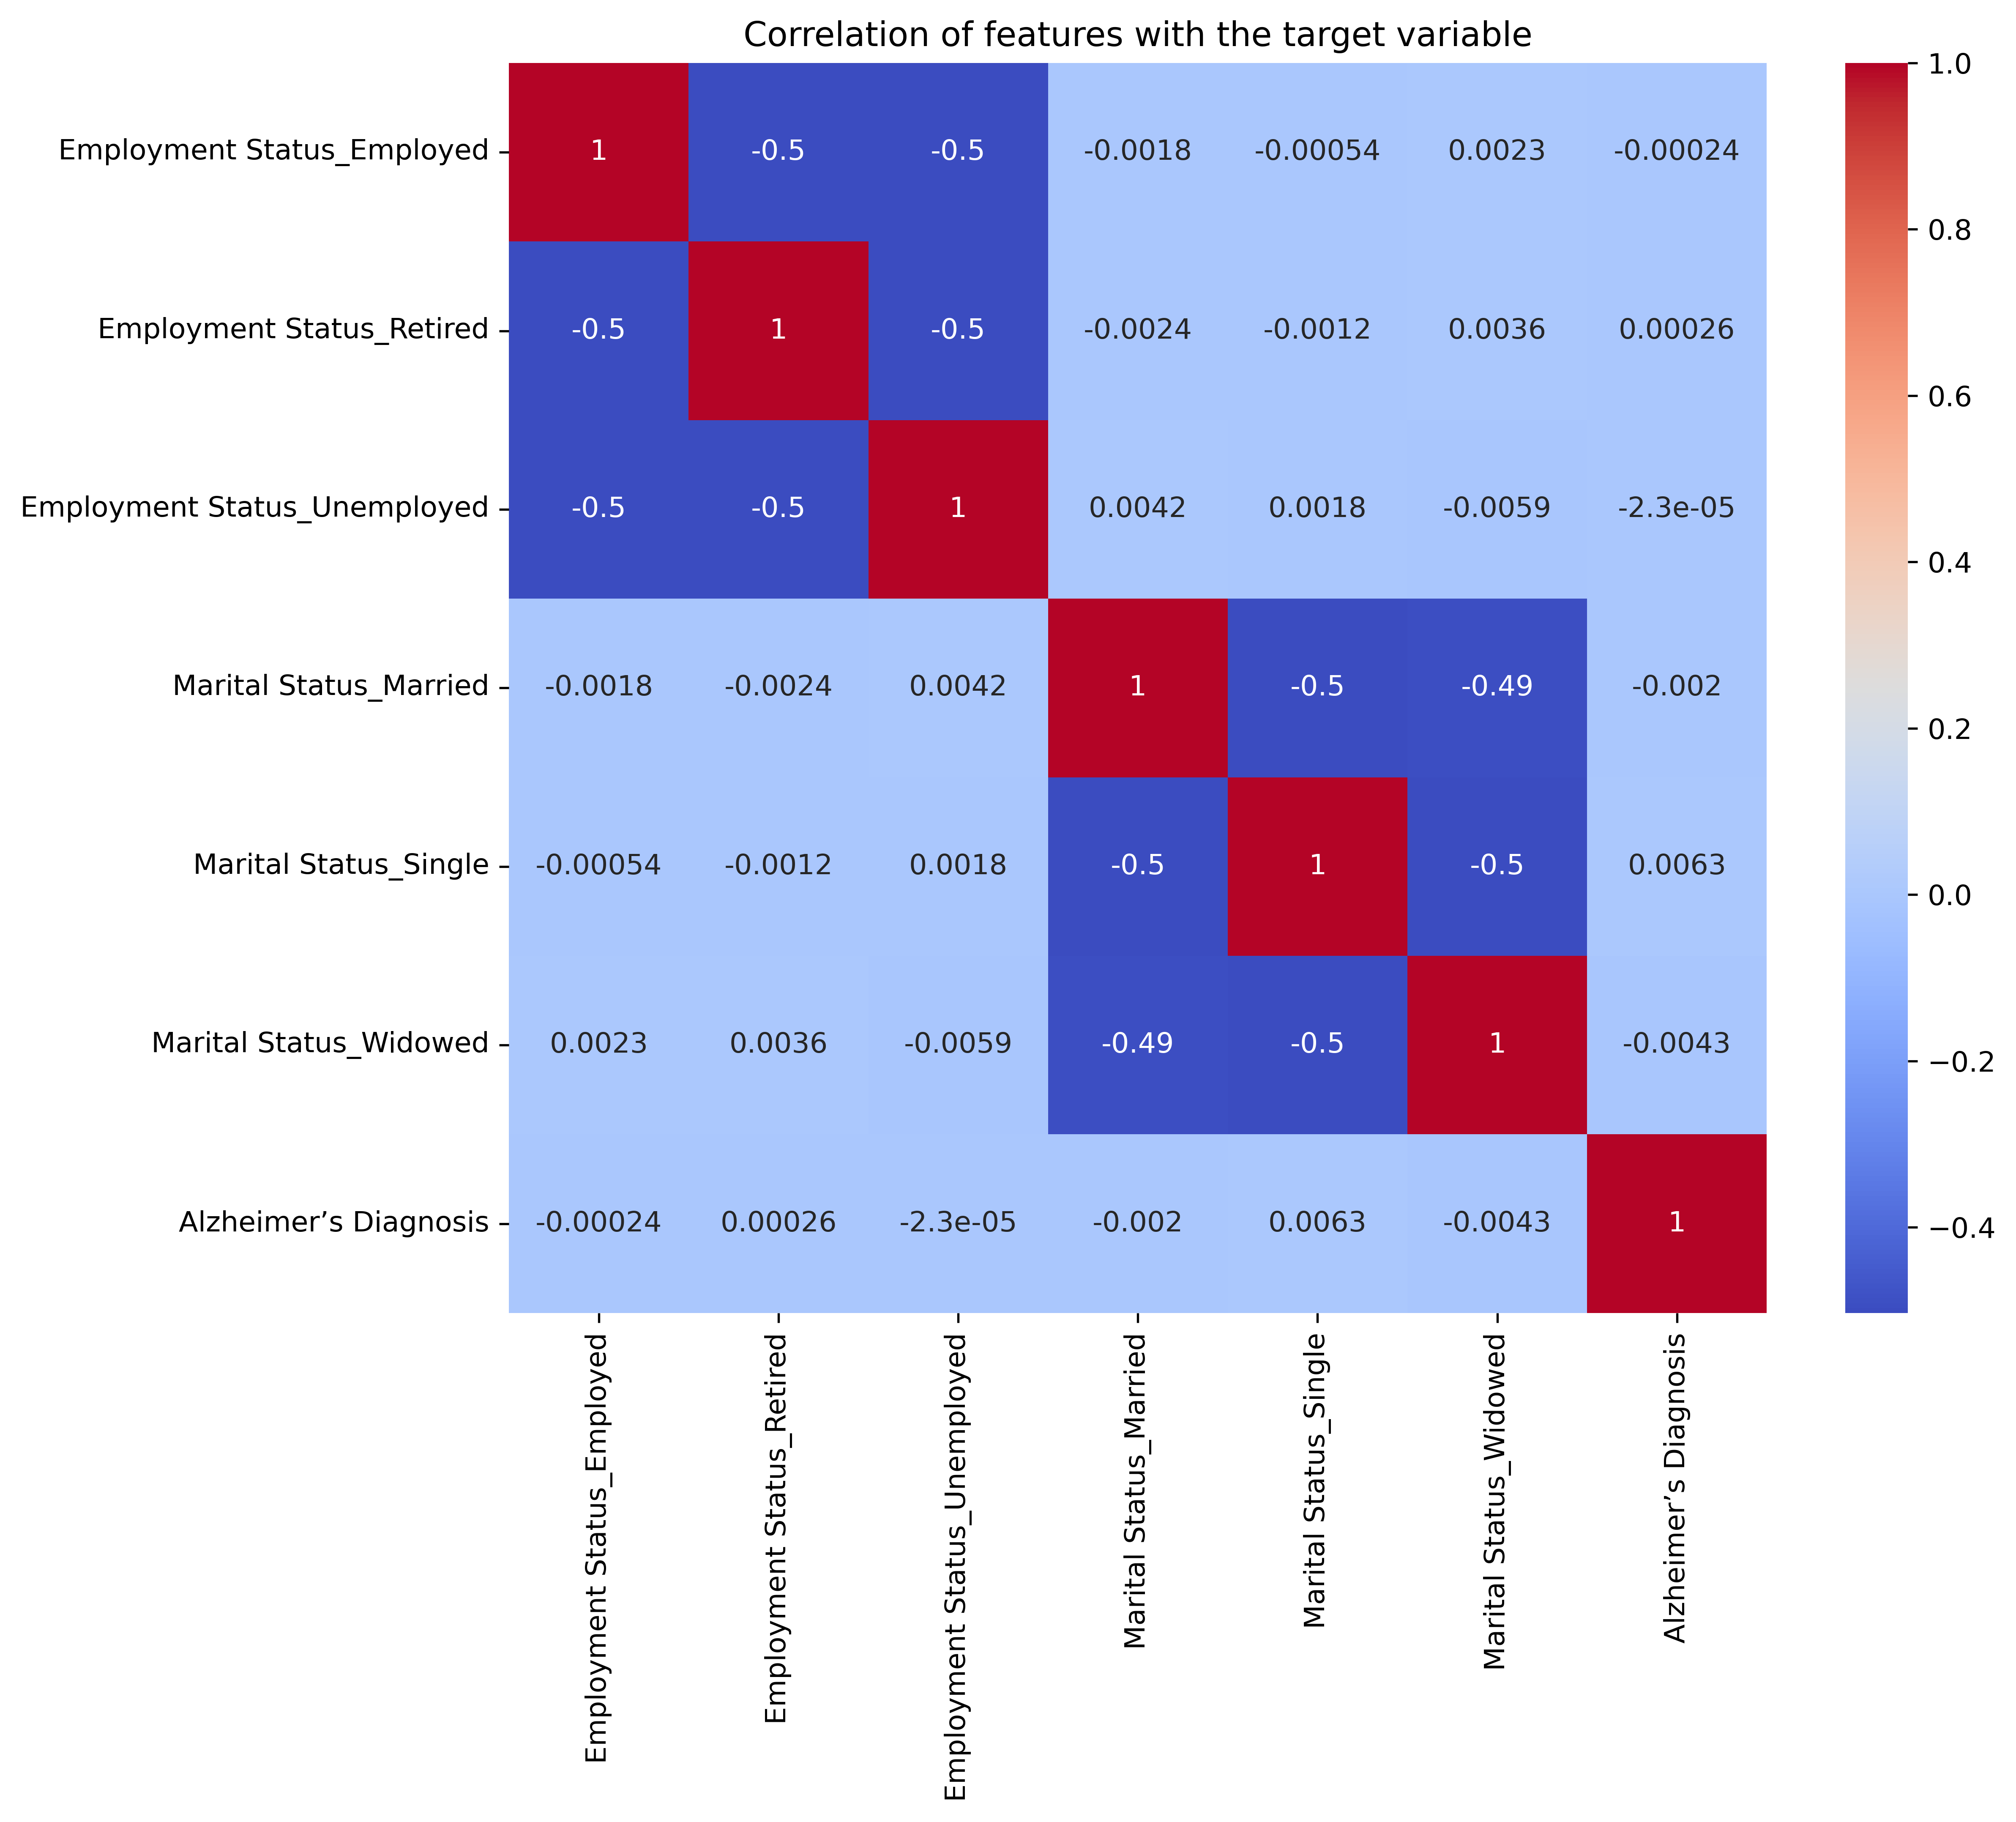

In [591]:
Xy_train = X_train.merge(y_train, left_index=True, right_index=True)
Xy_train_filter = Xy_train[['Employment Status_Employed', 'Employment Status_Retired',
       'Employment Status_Unemployed', 'Marital Status_Married',
       'Marital Status_Single', 'Marital Status_Widowed', 'Alzheimer’s Diagnosis']]
correlation_matrix = Xy_train_filter.corr()

plt.figure(figsize=(10,8), dpi = 480)
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.title("Correlation of features with the target variable")
plt.show()
correlation_matrix = X_train_filter.corr()

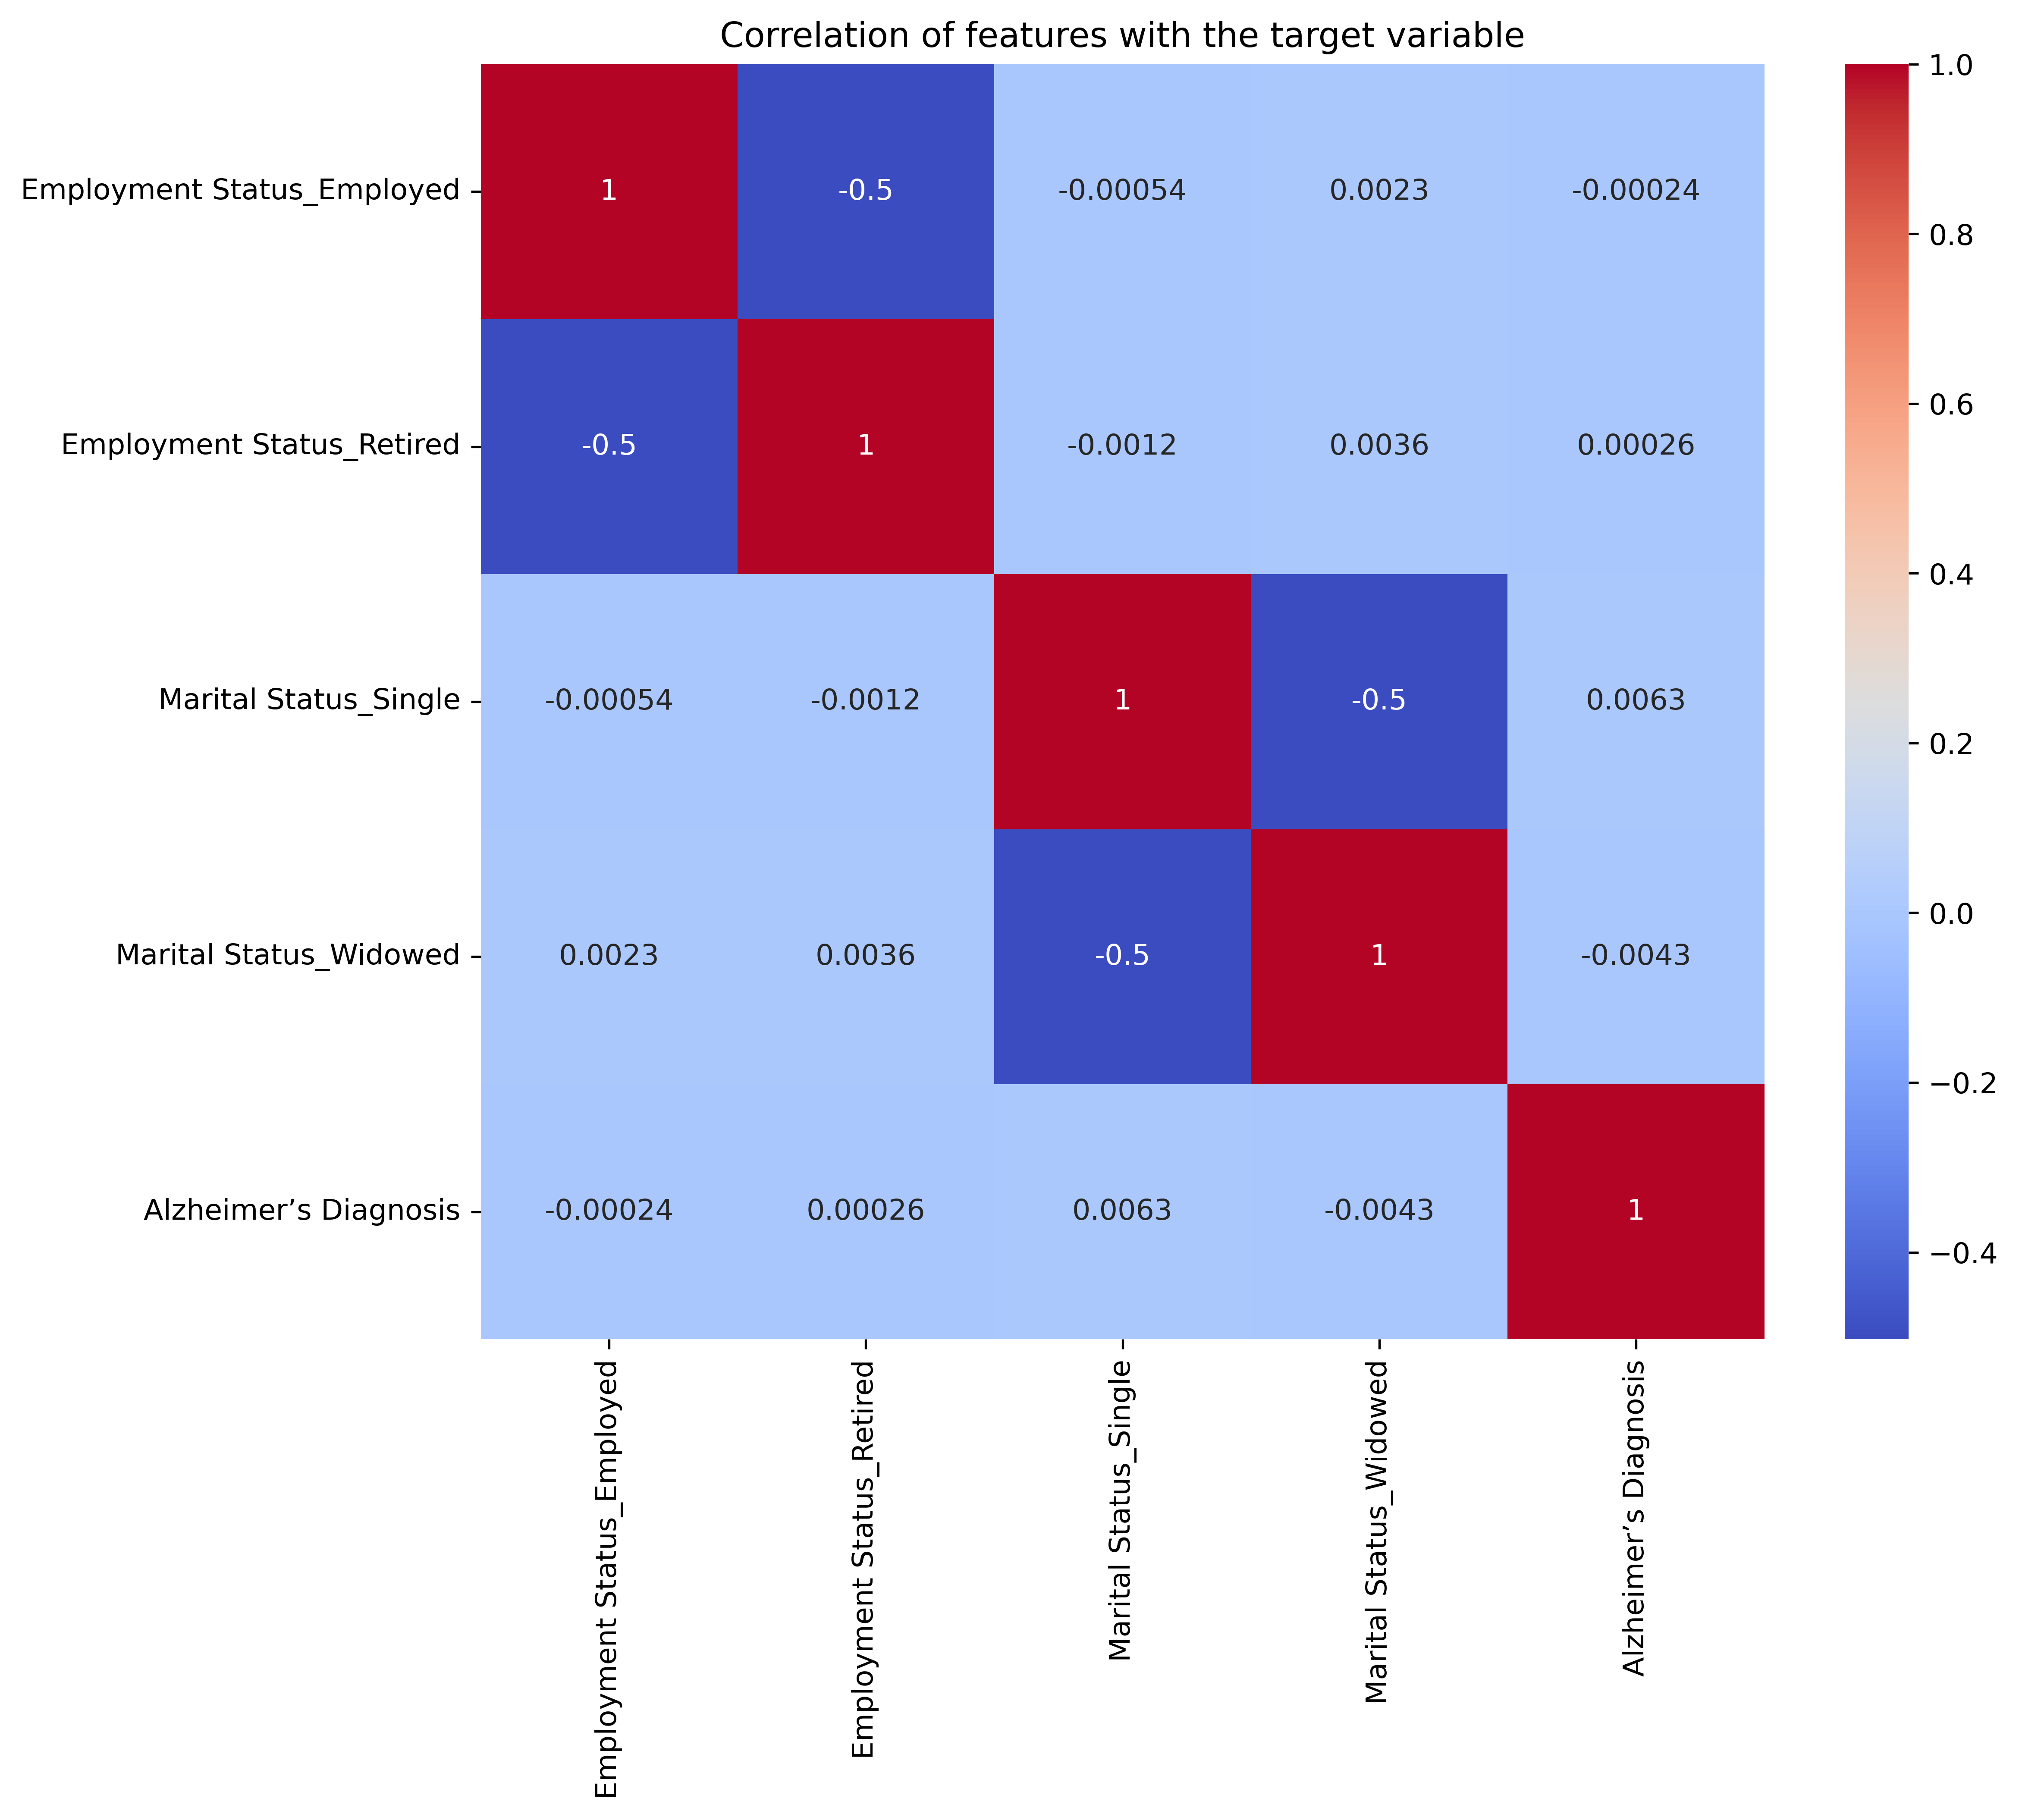

In [592]:
Xy_train = X_train.merge(y_train, left_index=True, right_index=True)
Xy_train_filter = Xy_train[['Employment Status_Employed', 'Employment Status_Retired',
       'Marital Status_Single', 'Marital Status_Widowed', 'Alzheimer’s Diagnosis']]
correlation_matrix = Xy_train_filter.corr()

plt.figure(figsize=(10,8), dpi = 480)
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.title("Correlation of features with the target variable")
plt.show()
correlation_matrix = X_train_filter.corr()